In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Fetch historical data
ticker = "NVDA"
period = "1mo"
interval = "1d"
data = yf.download(ticker, period=period, interval=interval)
print(data)

/var/folders/3n/c2cyvjmd52585bcd83mjw9dw0000gp/T/ipykernel_25159/3212626921.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period=period, interval=interval)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA
Date                                                                 
2025-07-07  158.240005  159.309998  157.339996  158.199997  140139000
2025-07-08  160.000000  160.220001  158.389999  159.330002  138133000
2025-07-09  162.880005  164.419998  161.160004  161.220001  183656400
2025-07-10  164.100006  164.500000  161.610001  164.320007  167704100
2025-07-11  164.919998  167.889999  163.470001  163.720001  193633300
2025-07-14  164.070007  165.490005  162.020004  165.369995  136975800
2025-07-15  170.699997  172.399994  169.199997  171.190002  230627400
2025-07-16  171.369995  171.750000  168.899994  171.059998  158831500
2025-07-17  173.000000  174.160004  170.830002  172.020004  160841100
2025-07-18  172.410004  174.250000  171.259995  173.639999  146456400
2025-07-21  171.380005  173.380005  171.000000  172.750000  123126100
2025-07-22  167.0299

In [8]:
# Calculate percentage change (vectorized)
data["Trend%"] = data["Close"].pct_change() * 100
print(data["Trend%"])

Date
2025-07-07         NaN
2025-07-08    1.112231
2025-07-09    1.800003
2025-07-10    0.749018
2025-07-11    0.499690
2025-07-14   -0.515396
2025-07-15    4.040952
2025-07-16    0.392500
2025-07-17    0.951161
2025-07-18   -0.341038
2025-07-21   -0.597412
2025-07-22   -2.538223
2025-07-23    2.245106
2025-07-24    1.733228
2025-07-25   -0.138141
2025-07-28    1.873199
2025-07-29   -0.701559
2025-07-30    2.142334
2025-07-31   -0.780950
2025-08-01   -2.333161
2025-08-04    3.615012
2025-08-05   -1.086112
Name: Trend%, dtype: float64


In [9]:
# Vectorized labeling: Use np.where for efficient assignment
data["TrendLabel"] = np.where(data["Trend%"] > 0, "Bullish",
                       np.where(data["Trend%"] < 0, "Bearish", None))


In [10]:
# Show result
print(data[["Close", "Trend%", "TrendLabel"]].tail(10))


Price            Close    Trend% TrendLabel
Ticker            NVDA                     
Date                                       
2025-07-23  170.779999  2.245106    Bullish
2025-07-24  173.740005  1.733228    Bullish
2025-07-25  173.500000 -0.138141    Bearish
2025-07-28  176.750000  1.873199    Bullish
2025-07-29  175.509995 -0.701559    Bearish
2025-07-30  179.270004  2.142334    Bullish
2025-07-31  177.869995 -0.780950    Bearish
2025-08-01  173.720001 -2.333161    Bearish
2025-08-04  180.000000  3.615012    Bullish
2025-08-05  178.044998 -1.086112    Bearish


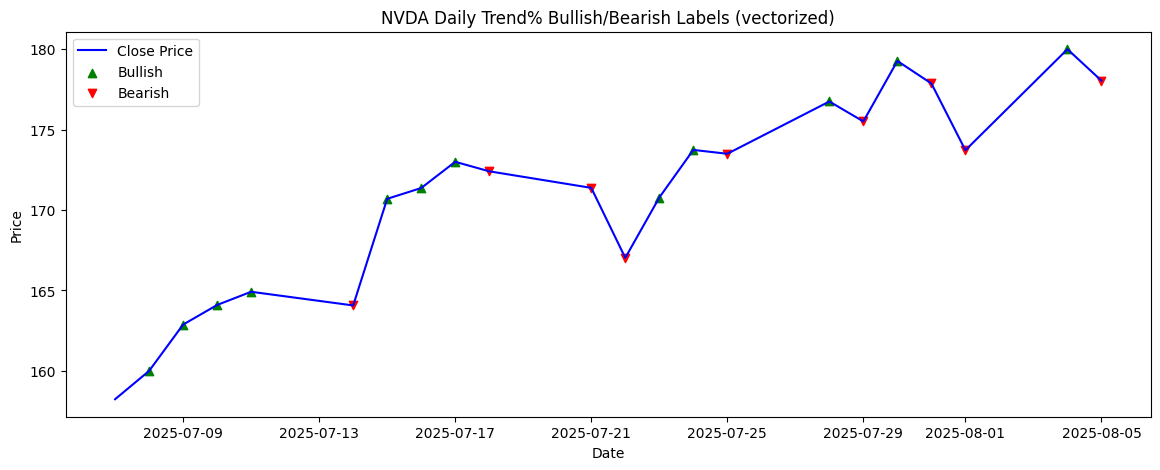

In [11]:

# Optional: visualization as before
plt.figure(figsize=(14,5))
plt.plot(data.index, data["Close"], label="Close Price", color="blue")
plt.scatter(data.index[data["TrendLabel"] == "Bullish"], data["Close"][data["TrendLabel"] == "Bullish"], color='green', marker='^', label="Bullish")
plt.scatter(data.index[data["TrendLabel"] == "Bearish"], data["Close"][data["TrendLabel"] == "Bearish"], color='red', marker='v', label="Bearish")
plt.title(f"{ticker} Daily Trend% Bullish/Bearish Labels (vectorized)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [13]:
data.to_csv("pct-chg.csv")